# Heart Disease UCI
**https://archive.ics.uci.edu/ml/datasets/Heart+Disease**

### Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Content
Attribute Information:
* **age**
* **sex**
* **chest pain type** (4 values)
* **resting blood pressure**
* **serum cholestoral** in mg/dl
* **fasting blood sugar** > 120 mg/dl
* **resting electrocardiographic results** (values 0,1,2)
* **maximum heart rate achieved**
* **exercise induced angina**
* ***oldpeak** = ST depression induced by exercise relative to rest
* **the slope** of the peak exercise ST segment
* **number of major vessels (0-3) colored by flourosopy**
* **thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect

## Creater - Rohan Kumar

In [1]:
# Importing all necessary libraries

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want plots to be appear inside notebook
%matplotlib inline

# Different models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Necessary metrics for model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

## Exploring Data

In [2]:
raw_data = pd.read_csv('heart-disease.csv')
raw_data.head() # first 5 entries

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# data types of corresponding columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# shape of the data set
raw_data.shape

(303, 14)

In [5]:
# some general statistics
raw_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
raw_data.isna().sum().any()

False

**Clearly, there is no null value in this data. Also every column is numerical.**

## Lets find out, how many people has heart disease?
* 1 being person has heart disease.
* 0 being person has no heart disease.

In [7]:
raw_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

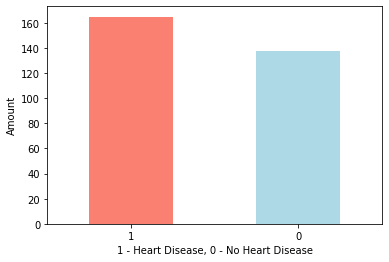

In [8]:
raw_data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xlabel('1 - Heart Disease, 0 - No Heart Disease')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()

**There are 165 people suffering from heart-disease, and 138 are not.**

Also both class has almost same strength. So data is good for appling machine learning.

### Comparing `sex` with `target` features

In [9]:
pd.crosstab(raw_data['target'], raw_data['sex'])

sex,0,1
target,,
0,24,114
1,72,93


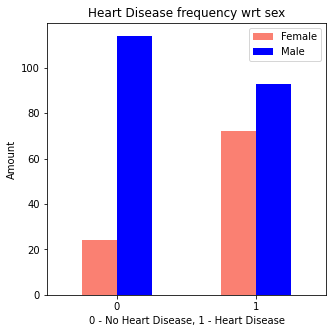

In [10]:
pd.crosstab(raw_data['target'], raw_data['sex']).plot(kind='bar', figsize=(5,5), color=['salmon','blue'])
plt.title('Heart Disease frequency wrt sex')
plt.xlabel('0 - No Heart Disease, 1 - Heart Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)
plt.show()

**Clearly, women are more likely to have heart disease than men.**

### Comparing `age` with `thalach` features

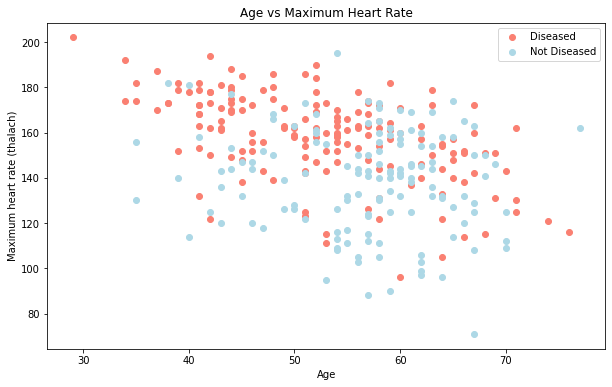

In [11]:
# creating figure
plt.figure(figsize=(10,6))

# scatter plot with heart disease
plt.scatter(raw_data.age[raw_data.target==1], raw_data.thalach[raw_data.target==1], c='salmon')

# scatter plot with negative disease
plt.scatter(raw_data.age[raw_data.target==0], raw_data.thalach[raw_data.target==0], c='lightblue')

plt.title('Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate (thalach)')
plt.legend(['Diseased','Not Diseased'])

plt.show()

In [12]:
# Compare cheat pain with target column
pd.crosstab(raw_data['cp'], raw_data['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


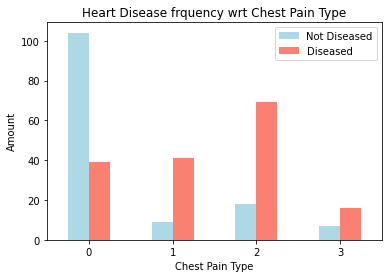

In [13]:
pd.crosstab(raw_data['cp'], raw_data['target']).plot(kind='bar', color=['lightblue','salmon'])
plt.title('Heart Disease frquency wrt Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['Not Diseased','Diseased'])
plt.xticks(rotation=0)
plt.show()

## Plotting some columns wrt `target` column

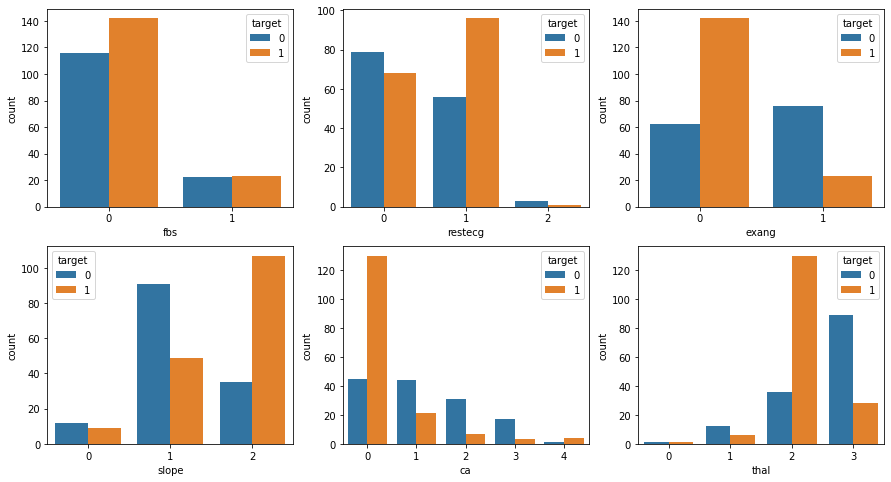

In [27]:
plt.figure(figsize=(15,8))
cols = ['fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cnt=1
for i in cols:
    plt.subplot(2,3,cnt)
    sns.countplot(data=raw_data, x=raw_data[i], hue='target', cmap='winter')
    cnt+=1
plt.show()

## Creating a correlation matrix

In [14]:
raw_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


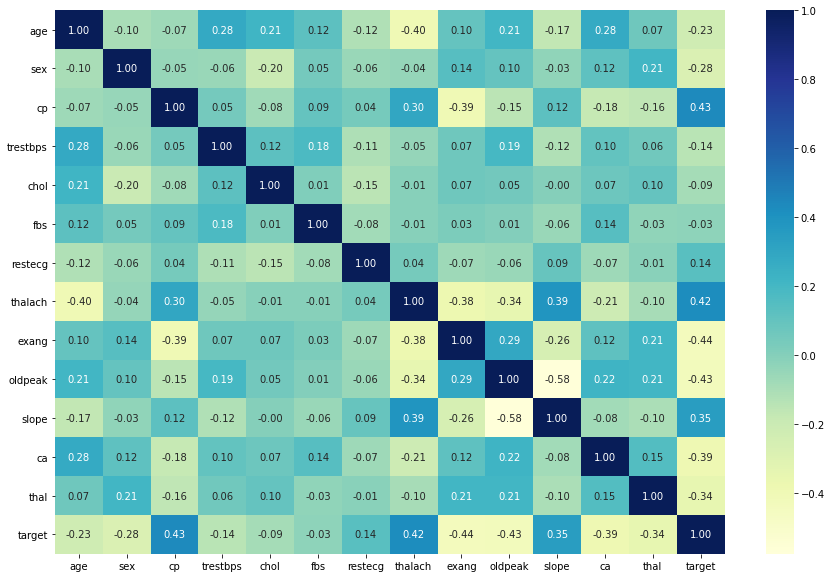

In [15]:
# let us see this in heatmap
corr_mat = raw_data.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 fmt='.2f',
                 cmap='YlGnBu')

# Modellin Starts..

In [16]:
raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# specifying target column(y) and feature columns(X)
y = raw_data['target']
X = raw_data.drop(columns='target') # X = raw_data.drop('target', axis=1)

np.random.seed(42) # so our results are reproducable

# Splitting our data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Now our data has been split into training and testing sets.

It is time to apply different Scikit-Learn models and check which one is better
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier

In [18]:
# putting models into dictionary 
models = {'Logistic Regression' : LogisticRegression(), 
          'Random Forest' : RandomForestClassifier(),
          'KNN' : KNeighborsClassifier()}

# to fit and score data set
def fit_score(models, X_train, X_test, y_train, y_test):
    '''
    This function fits the training sets to the given model and evaluate them on training set.
    models - a dictionary that contains different models
    X_train - features training set
    X_test - features testing set
    y_train - target training set
    y_test - target testing set
    '''
    # set random seed
    np.random.seed(42)
    
    # make model scoring dictionary
    model_scores = {}
    
    # loop through models dictionary
    for name, model in models.items():
        # fitting model with training data
        model.fit(X_train,y_train)
        # evaluate the model and append its score into model_score dictionary
        model_scores[name] = model.score(X_test,y_test)
        
    # returning model_score dictionary
    return model_scores

In [19]:
#evaluating scores of each model in models
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

c:\users\vio\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918,
 'KNN': 0.6885245901639344}

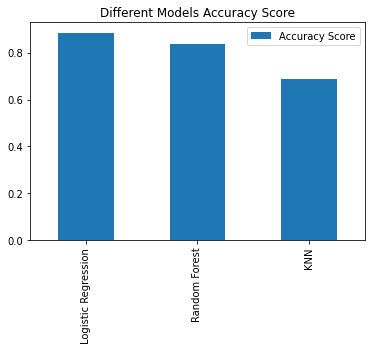

In [20]:
model_scores_df = pd.DataFrame(model_scores, index=['Accuracy Score'])
model_scores_df.T.plot(kind='bar');
plt.title('Different Models Accuracy Score')
plt.show()

# Hyperparameter tuning of the models
### By hand 

In [21]:
# lets starts by tuning of KNN model
train_score = []
test_score = []

# creating different list of n_neighbors of KNN model
neighbors =  range(1,21)

# setup KNN instance
KNN = KNeighborsClassifier()

# loop through different neighbors
for i in neighbors:
    
    # setting parameters
    KNN.set_params(n_neighbors=i)
    
    # fitting the KNN instnace
    KNN.fit(X_train,y_train)
    
    # appending training score and testing score
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))

In [22]:
# setting a dataframe to view scores
results = pd.DataFrame(neighbors, columns=['Number of Neighbors'])
results.set_index('Number of Neighbors', drop=True, inplace=True)
results['Train Score'] = train_score
results['Test Score'] = test_score
results

,Train Score,Test Score
Number of Neighbors,,
1,1.000000,0.622951
2,0.809917,0.639344
3,0.772727,0.655738
4,0.743802,0.672131
5,0.760331,0.688525
6,0.752066,0.721311
7,0.743802,0.704918
8,0.723140,0.688525
9,0.719008,0.688525


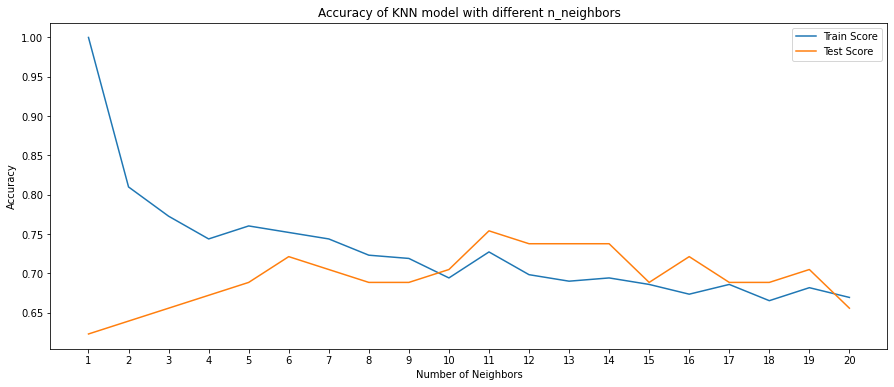

In [23]:
results.plot(figsize=(15,6))
plt.title('Accuracy of KNN model with different n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,21))
plt.show()

In [24]:
# maximum score on test data is
print(f'The maximum score on test set is {max(test_score)*100:.2f}%')

The maximum score on test set is 75.41%


**After hyperparamterized tuning, KNeighborsClassifier model does not achieve more accuracy than the other baseline models. Therefore, we are rejecting it from our future reference in this modelling problem.**

## Hyperparameter tuning with `RandomizedSearchCV`
And we are going to tune
* LogisticRegression()
* RandomForestClassifier()

In [25]:
# creating grid for hyper-parameterization of LogisticRegression()
log_reg_grid = {'C' : np.logspace(-4, 4, 20),
                'solver' : ['newton-cg', 'liblinear']}

# creating grid for hyper-parameterization of RandomForestClassifier()
rf_grid = {'n_estimators' : np.arange(50, 1000, 50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 1)}

In [26]:
# tune LogisticRegression()

np.random.seed(42)

# setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(),
                                param_distributions = log_reg_grid,
                                n_iter = 20,
                                cv = 5,
                                verbose = True)

# fit random  hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['newton-cg', 'liblinear']},
                   verbose=True)

In [27]:
# best hyperparameters from the following
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [29]:
# tune RandomForestClassifier()

np.random.seed(42)

# setup random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                                param_distributions = rf_grid,
                                n_iter = 20,
                                cv = 5,
                                verbose = True)

# fit random  hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])},
                   verbose=True)

In [30]:
# best hyperparamter from the following
rs_rf.best_params_

{'n_estimators': 250,
 'min_samples_split': 8,
 'min_samples_leaf': 12,
 'max_depth': 3}

In [31]:
rs_rf.score(X_test, y_test)

0.8852459016393442

**Clearly, performance of RandomForestClassifier() inscreases while performance of LogisticRegression() remain sames.**

**Also now both model has accuracy of 88.524%**

## Hyperparameter tuning with GridSearchCV
Sine our LogisticRegression() model is proven to be far better than others, we will tune its hyperparameriters using `GridSearchCV`.

In [32]:
 # creating different grid for hyper-parameterization of LogisticRegression()
log_reg_grid = {'C' : np.logspace(-4, 4, 30),
                'solver' : ['liblinear']}

np.random.seed(42)
# setup random hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(estimator = LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True)

# fitting it with training data
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
# best paramters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
# scoring our best model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating our tuned machince learning classifier, beyond accuracy score
* ROC and AUC
* Confusion Matrix
* Classification Report
* Precision score
* Recall score
* f1 score

In [36]:
# before evaluating our model, first we have to make predictions
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

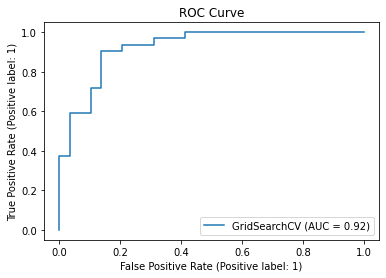

In [38]:
# plotting ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.title('ROC Curve')
plt.show()

In [39]:
# confusion matrix
confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [40]:
# another way of making confusion matrix
pd.crosstab(y_test, y_preds)

col_0,0,1
target,,
0,25,4
1,3,29


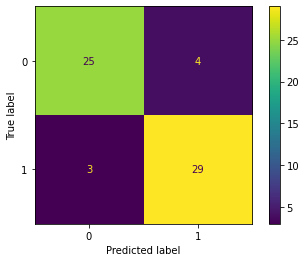

In [42]:
# plotting confusion matrix
plot_confusion_matrix(gs_log_reg, X_test, y_test)

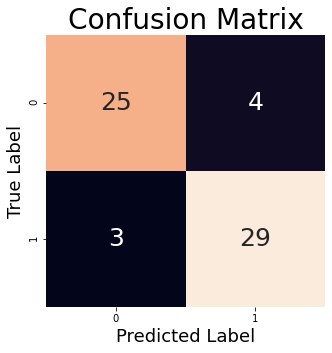

In [65]:
# another way of plotting confusion matrix
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot = True,
                 cbar = False,
                 annot_kws={'size': 25})
plt.title('Confusion Matrix', fontsize=28)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.show()

In [67]:
# Lets get classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Evaluating different metrics using Cross Validation
We are going to calculate accuracy, precision, recall and f1-score of our model using `cross_val_score`

In [68]:
# firstly get best parameters of LogisticRegression() model
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [69]:
# initiating new model with best parameters
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

In [72]:
# cross validted accuracy
cv_acc = cross_val_score(clf, X, y,
                         cv=5,
                         scoring = 'accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [73]:
cv_acc_score = np.mean(cv_acc)
cv_acc_score

0.8479781420765027

In [74]:
# cross validted precision
cv_pre = cross_val_score(clf, X, y,
                         cv=5,
                         scoring = 'precision')
cv_pre

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [75]:
cv_pre_score = np.mean(cv_pre)
cv_pre_score

0.8215873015873015

In [77]:
# cross validted recall
cv_re = cross_val_score(clf, X, y,
                         cv=5,
                         scoring = 'recall')
cv_re

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [81]:
cv_re_score = np.mean(cv_re)
cv_re_score

0.9272727272727274

In [79]:
# cross validted f1 score
cv_f1 = cross_val_score(clf, X, y,
                         cv=5,
                         scoring = 'f1')
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [83]:
cv_f1_score = np.mean(cv_f1)
cv_f1_score

0.8705403543192143

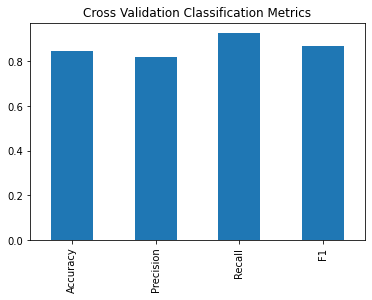

In [92]:
# Visualize these metrics
df = pd.DataFrame({'Accuracy' : cv_acc_score,
                   'Precision' : cv_pre_score,
                   'Recall' : cv_re_score,
                   'F1' : cv_f1_score},
                  index=[0])
df.T.plot(kind='bar', title='Cross Validation Classification Metrics', legend=False);

# Feature Importance
What features are important for prediction using this data

In [97]:
# initiating model instance
clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [98]:
# coefficient of each feature
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [104]:
# DataFrame of coefficient and their respective coefficient
feature_coef = pd.DataFrame(clf.coef_, columns=X_train.columns.tolist())
feature_coef

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003208,-0.86062,0.660014,-0.01156,-0.001665,0.040172,0.316034,0.024589,-0.604702,-0.567955,0.450854,-0.637333,-0.675551


<AxesSubplot:title={'center':'Coefficient of Features'}>

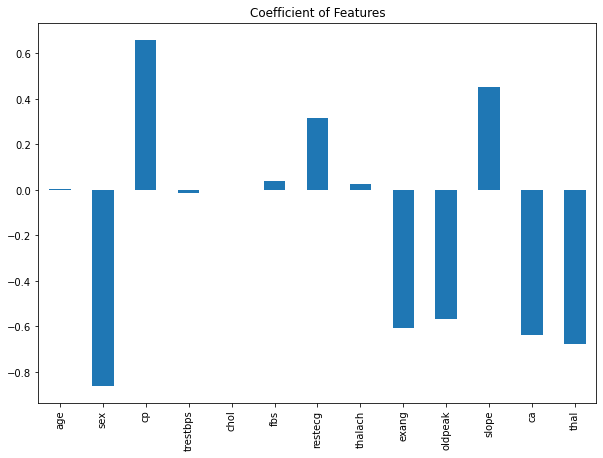

In [111]:
# visualizing coefficients
feature_coef.T.plot(kind='bar', figsize=(10,7), legend=False, title='Coefficient of Features')

**Clearly, `age`, `trestbps` and `chol` features doesnot provide that much information to the model**